In [1]:
import bartide
bartide.__version__

'0.0.2'

In [2]:
extractor = bartide.BarcodeExtractor(
    'test_data/LSK-B_T1_R1.fastq.gz',
    'test_data/LSK-B_T1_R2.fastq.gz'
)

In [3]:
extractor.identify_flanks()

Identifying flank sequences: 25000it [00:00, 64596.17it/s]


In [4]:
print (
    f" Barcode length: {extractor.barcodeLength}\n",
    f"Left flank sequence: {extractor.leftFlank}\n",
    f"Right flank sequence: {extractor.rightFlank}",
)

 Barcode length: 27
 Left flank sequence: GTAGCC
 Right flank sequence: AGATCG


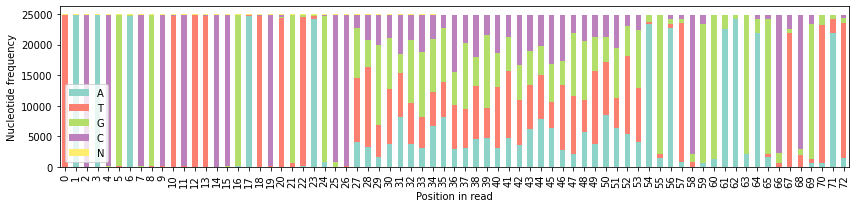

In [5]:
extractor.plot_composition()

In [6]:
extractor.count_barcodes()

Counting barcodes: 25000it [00:00, 29939.25it/s]
INFO: 25000 sequences processed. 1234 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


In [7]:
extractor.rawCounts

TTGTAGGGGTGTGTTCTACCGGTAATT    2843
GTGCTGGTAATGTGGGCGACGGTGGGG     913
TTGGTGAAGCATAGTTCCGTGATTGAA     909
TTCCATGACGTTAAATACCTCCTTATA     723
ATCTGGCGTCCAGCAGATATTAGTTTT     717
                               ... 
AAGTTACATGCCGCAAAGGGTTCTTTG       1
AAGGATGAATGACAAGGTGCTAGCCAT       1
GGTACAAGGCGGGATTACCATGCATTG       1
GTGCTGGAAATGTGGGCGACGGTGGGG       1
AAGTCACATGCCGCAAAGTGTCCATTG       1
Length: 1234, dtype: int64

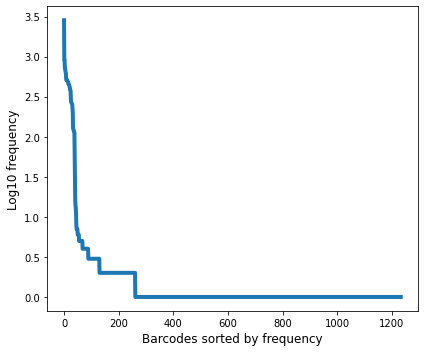

In [8]:
extractor.plot_barcode_frequency()

In [9]:
corrector = bartide.SeqCorrect()
corrector.run(extractor.rawCounts)

Filtering corrected barcodes: 100%|████████████████████████████████████████| 70/70 [00:00<?, ?it/s]


In [10]:
corrector.correctedCounts

TTGTAGGGGTGTGTTCTACCGGTAATT    3093
GTGCTGGTAATGTGGGCGACGGTGGGG    1000
TTGGTGAAGCATAGTTCCGTGATTGAA     982
TTCCATGACGTTAAATACCTCCTTATA     773
ATCTGGCGTCCAGCAGATATTAGTTTT     788
GGGAATGAATTTGTCAAATATTATGTG     716
ACTTAGCGACCTTCTTCCAGTATCCTG     683
TCGATTTTTCGGACTGCACTGATATCG     632
ATCGGGTGACCCCCGCTTAAGTCTGTT     559
TGTGCAACGTGCGTGAGGTTTAGACGT     546
GACGTGGTAGGTGAAAAGATCTGTGAG     557
GGTACAAGGCGGGTTTACCATGCATTG     547
AAGGATGAATGACAAGGAGCTAGCCAT     543
GAGATCGTACAGGGCTGTGTAGCTAAG     529
TTGGTCTATCGAATACGTGGTTGTATA     525
GGATCTCCACCCGGTGCCGTATATCGT     525
GTGGTCTAGAACGGGTGAATGGTCCTT     502
GGCGGCCCATTATTCTGATTATGCTGG     505
GGTTAAGATCGCACTCTTCCCGTGTAG     481
CTCCCATTTCGATCGTATAGTCGACGC     464
AAGTTACATGCCGCAAAGGGTCTATTG     478
GTAGCGTGGGTCCTTCTTCCTGTAGGC     446
TTAGCTCCCATCGTTGGTAGGTCAAGA     413
TTTGAATCAGGAGCCGACGTTGTGCTT     401
TCGCCTTTGCTCGTCTCGTGTCTGGTG     419
CCATACGGGTCAGTCGTCCGCCTGGCG     301
TTGTTCTGGGGTGTTTTTGATCACTTC     293
TGGTCTCGTGTCAATCTCATCCGTCCA 

In [11]:
corrector.save_to_csv('test_data/barcodes_freq_sample1.csv')